In [1]:
# Insert some packages
import re
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import string
from nltk.corpus import stopwords
#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
def extract_frequencies(filename):
    d = dict()
    with open(filename, "r") as f:
        for line in f:
            line = line.lower().rstrip().split(' ') # delete the blank at the end of the string
            for word in line:
                word = re.sub(r'\W+', '', word) # delete sth like', and ()'
                if word:
                    d[word] = d.get(word, 0) + 1
    return d

def to_csv(dic, filename):
    with open(filename, "w") as f:
        for k, v in dic.items():
            f.write("{},{}\n".format(k, v))

In [3]:
frequencies = extract_frequencies("mobydick.txt")

In [4]:
to_csv(frequencies, "frequencies.csv")

In [5]:
col=['word', 'frequency']
df = pd.read_csv("frequencies.csv",names=col,header=None)
df.sort_values("frequency",inplace=True,ascending=False)
df = df.reset_index(drop=True)
df.head(5)

,word,frequency
0,the,14321
1,of,6580
2,and,6362
3,a,4628
4,to,4577


In [6]:
# Compute the number of tokens in the corpus
vocabulary_size = df.shape[0]
tokens_size = df['frequency'].sum()
print(f'Vocabulary size: {vocabulary_size:>7,}\nNumber of tokens: {tokens_size:,}')

Vocabulary size:  19,964
Number of tokens: 212,029


In [7]:
# Calculate the proportion of each word
df['proportion'] = df['frequency']/df['frequency'].sum()
df.head()

,word,frequency,proportion
0,the,14321,0.067543
1,of,6580,0.031033
2,and,6362,0.030005
3,a,4628,0.021827
4,to,4577,0.021587


## Zipf's law 
The formula of zipf's law is:

$f(k ; s, N)=\frac{1 / k^{s}}{\sum_{n=1}^{N}\left(1 / n^{s}\right)}$

where 

+ N be the number of elements;

+ k be their rank;

+ s be the value of the exponent characterizing the distribution.

In [8]:
# Compute the predicted proportion by using zipf's law
N = df['frequency'].sum()
def zipf(N, k, s=1):
    return (1/k**s)/(np.sum(1/(np.arange(1, N+1)**s)))

vectorize_zipf = np.vectorize(lambda x: zipf(N, x))
df['predicted_proportion'] = vectorize_zipf(df.index.values + 1)
df.head()

,word,frequency,proportion,predicted_proportion
0,the,14321,0.067543,0.077871
1,of,6580,0.031033,0.038936
2,and,6362,0.030005,0.025957
3,a,4628,0.021827,0.019468
4,to,4577,0.021587,0.015574


In [9]:
def plot_word_frequency(df, top_n):
    df.sort_values("frequency",inplace=True,ascending=False)
    df.head(top_n)
    labels = df.iloc[:top_n, 0]
    counts = df.iloc[:top_n, 1]
    plt.figure(figsize=(15,5))
    plt.title("Most Frequent Words in the Corpus")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plot = sns.barplot(labels,counts)
    return plot

<AxesSubplot:title={'center':'Most Frequent Words in the Corpus'}, xlabel='word', ylabel='frequency'>

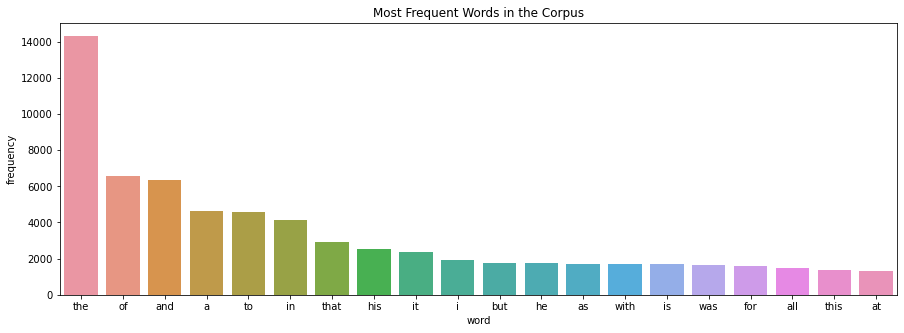

In [10]:
plot_word_frequency(df,20)

## Remove Stopwords

In [11]:
def extract_frequencies_stopwords(filename):
    d = dict()
    with open(filename, "r") as f:
        for line in f:
            line = line.lower().rstrip().split(' ') # delete the blank at the end of the string
            for word in line:
                word = re.sub(r'\W+', '', word) # delete sth like', and ()'
                if word not in stopwords.words("english"):
                    d[word] = d.get(word, 0) + 1
    return d

In [12]:
frequencies_plus = extract_frequencies_stopwords("mobydick.txt")

In [13]:
to_csv(frequencies_plus, "frequencies_plus.csv")

In [14]:
col=['word', 'frequency']
df_plus = pd.read_csv("frequencies_plus.csv",names=col,header=None)
df_plus.head()

,word,frequency
0,moby,80
1,dick,77
2,whale,955
3,NaN,9014
4,herman,2


In [15]:
vocabulary_size_plus = df_plus.shape[0]
tokens_size_plus = df_plus['frequency'].sum()
print(f'Vocabulary size: {vocabulary_size_plus:>7,}\nNumber of tokens: {tokens_size_plus:,}')

Vocabulary size:  19,836
Number of tokens: 117,783


<AxesSubplot:title={'center':'Most Frequent Words in the Corpus'}, xlabel='word', ylabel='frequency'>

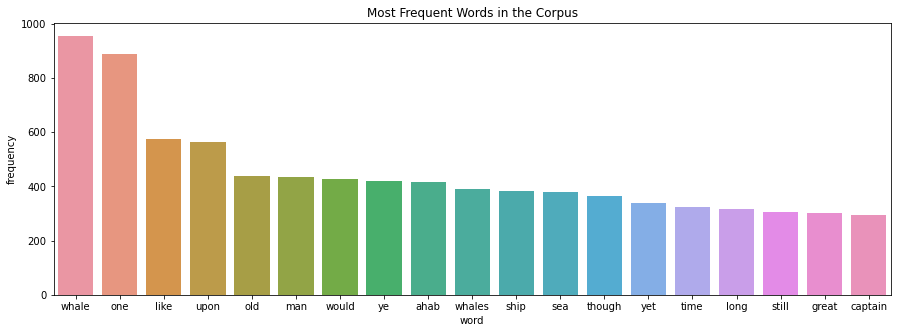

In [16]:
plot_word_frequency(df_plus,20)